In [1]:
%pip install yfinance
%pip install scipy
%pip install plotly
%pip install seaborn
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from scipy import stats
import yfinance as yf
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
dados_ibov = yf.download('^BVSP', start='2022-01-01', end='2023-01-01')
dados_ibov['retornos'] = dados_ibov.Close.pct_change()*100
dados_ibov

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,retornos
Date,,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500,NaN
2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600,-0.392602
2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0,-2.422861
2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200,0.549472
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200,1.140201
...,...,...,...,...,...,...,...
2022-12-23,107552.0,109994.0,107552.0,109698.0,109698.0,12847100,2.218661
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500,-0.875130
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100,-0.359580


In [4]:

dados_ibov['dia_semana'] = dados_ibov.index.day_name()
dados_ibov['dia_semana_num'] = dados_ibov.index.day_of_week
dados_ibov['semana_ano'] = dados_ibov.index.isocalendar().week
dados_ibov['ano'] = dados_ibov.index.year
dados_ibov['ano_semana'] = dados_ibov['ano'].astype(str) + "_" + dados_ibov['semana_ano'].astype(str)
dados_ibov

,Open,High,Low,Close,Adj Close,Volume,retornos,dia_semana,dia_semana_num,semana_ano,ano,ano_semana
Date,,,,,,,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500,NaN,Monday,0,1,2022,2022_1
2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600,-0.392602,Tuesday,1,1,2022,2022_1
2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0,-2.422861,Wednesday,2,1,2022,2022_1
2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200,0.549472,Thursday,3,1,2022,2022_1
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200,1.140201,Friday,4,1,2022,2022_1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,107552.0,109994.0,107552.0,109698.0,109698.0,12847100,2.218661,Friday,4,51,2022,2022_51
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500,-0.875130,Monday,0,52,2022,2022_52
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100,-0.359580,Tuesday,1,52,2022,2022_52


In [5]:
dados_seg_sex = dados_ibov[(dados_ibov['dia_semana']=='Monday') | (dados_ibov['dia_semana']=='Friday')]
dados_seg_sex.head(10)

,Open,High,Low,Close,Adj Close,Volume,retornos,dia_semana,dia_semana_num,semana_ano,ano,ano_semana
Date,,,,,,,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500,NaN,Monday,0,1,2022,2022_1
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200,1.140201,Friday,4,1,2022,2022_1
2022-01-10,102719.0,102719.0,101038.0,101945.0,101945.0,10264700,-0.753512,Monday,0,2,2022,2022_2
2022-01-14,105530.0,107062.0,105028.0,106928.0,106928.0,11457100,1.324742,Friday,4,2,2022,2022_2
2022-01-17,106927.0,106928.0,106097.0,106692.0,106692.0,6924200,-0.220709,Monday,0,3,2022,2022_3
2022-01-21,109097.0,109786.0,108368.0,108942.0,108942.0,13408400,-0.146652,Friday,4,3,2022,2022_3
2022-01-24,108941.0,108948.0,106624.0,107752.0,107752.0,12700800,-1.092324,Monday,0,4,2022,2022_4
2022-01-28,112611.0,112969.0,111407.0,111478.0,111478.0,13520100,-0.745225,Friday,4,4,2022,2022_4
2022-01-31,111910.0,112495.0,111195.0,112388.0,112388.0,12190800,0.816305,Monday,0,5,2022,2022_5


In [6]:
dados_media = dados_seg_sex[['dia_semana_num','dia_semana','retornos']].groupby(['dia_semana_num','dia_semana']).mean()
dados_media = dados_media.droplevel(0, axis=0)
dados_sem = dados_seg_sex[['dia_semana_num','dia_semana','retornos']].groupby(['dia_semana_num','dia_semana']).sem()
dados_sem = dados_sem.droplevel(0, axis=0)
dados_desde_2010 = pd.concat([dados_media, dados_sem], axis=1)
dados_desde_2010.columns = ['Media_retornos', 'SEM_retornos']
dados_desde_2010

,Media_retornos,SEM_retornos
dia_semana,,
Monday,-0.171282,0.226659
Friday,0.029254,0.203671


In [7]:
fig = go.Figure()

fig.add_trace(go.Bar(name='Retornos', x=dados_desde_2010.index, y=dados_desde_2010.Media_retornos,
                     error_y=dict(type='data', array=dados_desde_2010.SEM_retornos),
                     marker_color='orange', orientation='v'))

fig.update_layout(title_text='<b>Retornos IBOV</b> (média \xB1 erro padrão da média) por dia da semana <br><b>desde 2010', xaxis_title= '<b>Dia da semana',
                  yaxis_title= '<b>Retorno médio diário (%)', template="none", margin=dict(l=75, r=20, t=75, b=75),
                  paper_bgcolor="#f7f8fa", font=dict(family="Arial", size=13, color="black"), width=600, height=400)

fig.show()

In [8]:
dados = {'Data':[], 'Monday':[], 'Friday':[], 'Week_monday':[], 'Week_friday':[]}

for i in range(1,len(dados_seg_sex)):
  if (dados_seg_sex.iloc[i-1]['dia_semana']=='Friday') and (dados_seg_sex.iloc[i]['dia_semana']=='Monday'):
    if dados_seg_sex.iloc[i-1]['semana_ano']==(dados_seg_sex.iloc[i]['semana_ano']-1):
      dados['Data'].append(dados_seg_sex.index[i])
      dados['Monday'].append(dados_seg_sex.iloc[i]['retornos'])
      dados['Week_monday'].append(dados_seg_sex.iloc[i]['ano_semana'])
      dados['Friday'].append(dados_seg_sex.iloc[i-1]['retornos'])
      dados['Week_friday'].append(dados_seg_sex.iloc[i-1]['ano_semana'])

df_analise = pd.DataFrame(dados)

df_analise.head(10)

,Data,Monday,Friday,Week_monday,Week_friday
0,2022-01-10,-0.753512,1.140201,2022_2,2022_1
1,2022-01-17,-0.220709,1.324742,2022_3,2022_2
2,2022-01-24,-1.092324,-0.146652,2022_4,2022_3
3,2022-01-31,0.816305,-0.745225,2022_5,2022_4
4,2022-02-07,-0.221836,0.491513,2022_6,2022_5
5,2022-02-14,0.206917,0.187899,2022_7,2022_6
6,2022-02-21,-0.924908,-0.669438,2022_8,2022_7
7,2022-03-07,-2.516729,-0.600872,2022_10,2022_9
8,2022-03-14,-1.597844,-1.715598,2022_11,2022_10
9,2022-03-21,0.731934,1.976547,2022_12,2022_11


In [9]:
df_analise['diff_sex_seg'] = df_analise.Friday - df_analise.Monday

In [10]:
teste_normalidade = stats.normaltest(df_analise['diff_sex_seg'])
print(teste_normalidade)

NormaltestResult(statistic=0.6136865020392478, pvalue=0.7357659224268878)


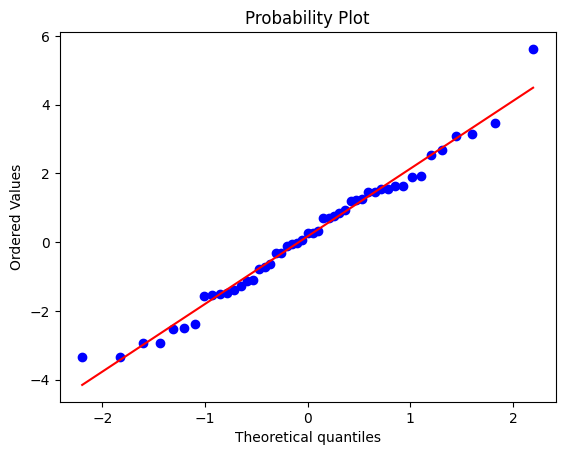

In [11]:

stats.probplot(df_analise.diff_sex_seg, dist="norm", plot=plt)
plt.show()

In [12]:
stats.ttest_rel(df_analise.Monday, df_analise.Friday)

TtestResult(statistic=-0.6062748057855685, pvalue=0.5471889803488991, df=48)